In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

2022-06-19 12:44:25.287462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 12:44:25.287482: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('../DATA/train.csv')

In [20]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_x = data.iloc[:,1:].values.astype('float32')
train_y = data.iloc[:,0].values.astype('int32')

In [23]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
train_y

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [25]:
train_x = train_x/255.0

(-0.5, 27.5, 27.5, -0.5)

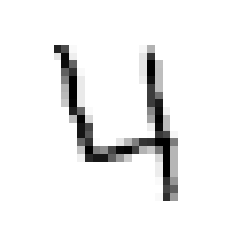

In [28]:
import matplotlib as mat
import matplotlib.pyplot as plt


plt.imshow(train_x[3].reshape(28,28),cmap=mat.cm.binary)
plt.axis("off")

In [29]:
train_x.shape

(42000, 784)

In [30]:
train_x = train_x.reshape(train_x.shape[0], 28, 28,1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_validate,y_train,y_validate = train_test_split(train_x,train_y,test_size=0.3)

# Tensorflow Implementation

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-06-19 13:22:34.770069: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-19 13:22:34.770141: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mainserver): /proc/driver/nvidia/version does not exist
2022-06-19 13:22:34.771017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

# Flatten

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_validate, y_validate))

Epoch 1/10
919/919 [==============================] - 12s 13ms/step - loss: 0.2273 - accuracy: 0.9289 - val_loss: 0.1107 - val_accuracy: 0.9663
Epoch 2/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0574 - accuracy: 0.9819 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 3/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 4/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 5/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0520 - val_accuracy: 0.9860
Epoch 6/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch 7/10
919/919 [==============================] - 12s 13ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0492 - val_accuracy:

## Evaluate the model

394/394 - 1s - loss: 0.0596 - accuracy: 0.9846 - 1s/epoch - 3ms/step


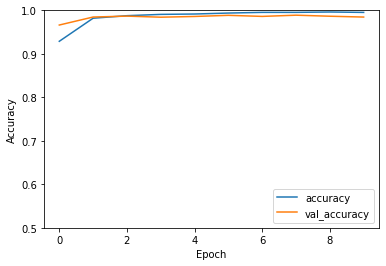

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_validate,  y_validate, verbose=2)

In [42]:
print(test_acc)

0.9846031665802002


In [43]:
test_data = pd.read_csv('../DATA/test.csv')

## processing the test data

In [44]:
test_data = test_data.values.astype('float32')

In [45]:
test_data = test_data/255.0

(-0.5, 27.5, 27.5, -0.5)

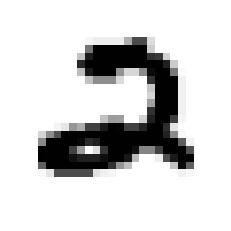

In [47]:
plt.imshow(test_data[0].reshape(28,28),cmap=mat.cm.binary)
plt.axis("off")

In [50]:
test_data = test_data.reshape(test_data.shape[0],28,28,1)

In [51]:
test_data_predict = model.predict(test_data)

875/875 [==============================] - 3s 3ms/step


In [55]:
test_data_predict[0]

array([ -5.7715044,  -3.0078669,  20.17329  ,   2.2644022, -11.023214 ,
        -7.2433124,  -6.8995786,   2.256567 ,   1.2078731,  -5.7231207],
      dtype=float32)